<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install matplotlib_venn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 151.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 205.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 153.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 135.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 144.0 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 174.2 MB/s eta 0:00:0000:01
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=9c57045a5e181406812aeb1bb52621e3b16d6adf41f42477b9cb6fd6a0393133
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matpl

In [2]:
!pip install numpy
!pip install scipy

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib_venn import venn2
from scipy.stats import pearsonr, spearmanr
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
#df = pd.read_csv('cleaned_survey_data.csv')
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
## Write your code here
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [5]:
duplicates = df.drop(columns=['ResponseId']).duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows (excluding 'ResponseId'):", num_duplicates)
df_cleaned=df[~duplicates]

Number of duplicate rows (excluding 'ResponseId'): 487


In [6]:
df_cleaned.loc[:,'YearsCodePro'] = df_cleaned['YearsCodePro'].str.strip()
df_cleaned.loc[:,'YearsCodePro'] = df_cleaned['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)

print(df_cleaned['YearsCodePro'].value_counts(dropna=False))


YearsCodePro
NaN     13340
2.0      4168
3.0      4093
5.0      3526
10.0     3251
4.0      3215
0.5      2856
6.0      2843
1.0      2639
8.0      2549
7.0      2517
12.0     1777
15.0     1635
20.0     1549
9.0      1493
11.0     1312
13.0     1127
14.0     1082
25.0      998
16.0      946
18.0      867
17.0      814
30.0      689
24.0      632
19.0      516
22.0      492
23.0      448
26.0      426
27.0      380
21.0      380
28.0      342
35.0      285
29.0      196
40.0      194
32.0      194
34.0      169
38.0      134
33.0      132
36.0      119
31.0      106
37.0      104
45.0       56
42.0       55
39.0       54
41.0       51
51.0       50
44.0       42
43.0       37
46.0       21
50.0       14
48.0       14
49.0       11
47.0       10
Name: count, dtype: int64


In [7]:
df_cleaned.dropna(subset=["YearsCodePro"], inplace=True)
print(df_cleaned['YearsCodePro'].value_counts(dropna=False))

YearsCodePro
2.0     4168
3.0     4093
5.0     3526
10.0    3251
4.0     3215
0.5     2856
6.0     2843
1.0     2639
8.0     2549
7.0     2517
12.0    1777
15.0    1635
20.0    1549
9.0     1493
11.0    1312
13.0    1127
14.0    1082
25.0     998
16.0     946
18.0     867
17.0     814
30.0     689
24.0     632
19.0     516
22.0     492
23.0     448
26.0     426
27.0     380
21.0     380
28.0     342
35.0     285
29.0     196
40.0     194
32.0     194
34.0     169
38.0     134
33.0     132
36.0     119
31.0     106
37.0     104
45.0      56
42.0      55
39.0      54
41.0      51
51.0      50
44.0      42
43.0      37
46.0      21
50.0      14
48.0      14
49.0      11
47.0      10
Name: count, dtype: int64


/tmp/ipykernel_302/3976864290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=["YearsCodePro"], inplace=True)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [8]:
## Write your code here
print("Employment Distribution:\n")
print(df_cleaned['Employment'].value_counts(dropna=False))
print("\n" + "-"*50 + "\n")

# Display value counts for Job Satisfaction
print("Job Satisfaction Distribution:\n")
print(df_cleaned['JobSat'].value_counts(dropna=False))
print("\n" + "-"*50 + "\n")

# Display value counts for Years of Professional Coding Experience
print("YearsCodePro Distribution:\n")
print(df_cleaned['YearsCodePro'].value_counts(dropna=False).sort_index())

Employment Distribution:

Employment
Employed, full-time                                                                                                   34719
Independent contractor, freelancer, or self-employed                                                                   4108
Employed, full-time;Independent contractor, freelancer, or self-employed                                               3226
Not employed, but looking for work                                                                                     1377
Student, full-time                                                                                                     1336
                                                                                                                      ...  
Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time;Employed, part-time          1
Not employed, but looking for work;Not employed, and not looking for work;Student, part-time   

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


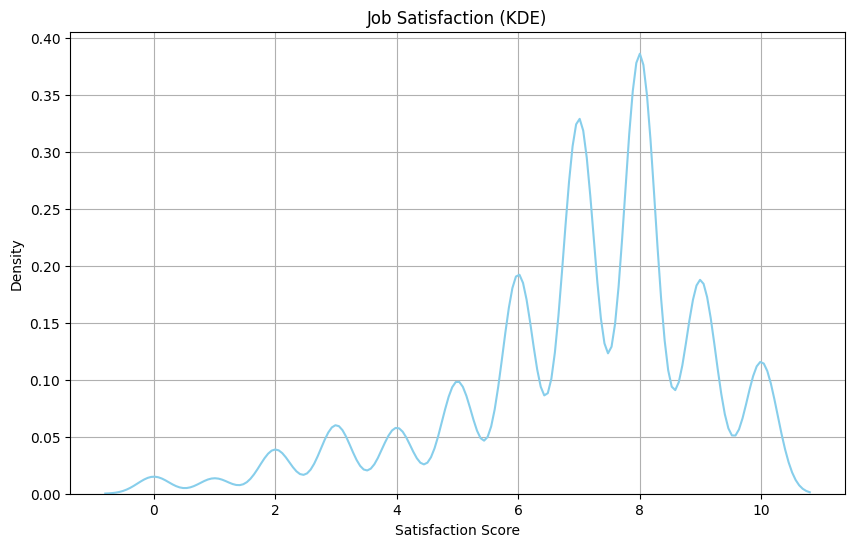

In [9]:
## Write your code here
df_cleaned.loc[:,'JobSat'] = pd.to_numeric(df_cleaned['JobSat'], errors='coerce')
# Plot the KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['JobSat'].dropna(),  color='skyblue')
plt.title('Job Satisfaction (KDE)')
plt.xlabel('Satisfaction Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [10]:
print(df_cleaned['LanguageHaveWorkedWith'].value_counts(dropna=False))
print('--------------------------------')
print(df_cleaned['LanguageWantToWorkWith'].value_counts(dropna=False))

LanguageHaveWorkedWith
NaN                                                                    1687
HTML/CSS;JavaScript;TypeScript                                          887
Python                                                                  608
HTML/CSS;JavaScript;PHP;SQL                                             445
C#;HTML/CSS;JavaScript;SQL;TypeScript                                   401
                                                                       ... 
HTML/CSS;Java;JavaScript;PHP;Python;R;SQL;VBA                             1
Apex;HTML/CSS;Java;JavaScript;Python;TypeScript;Zephyr                    1
HTML/CSS;Java;JavaScript;Kotlin;MicroPython;Python;Scala;TypeScript       1
Bash/Shell (all shells);C;JavaScript;PowerShell                           1
Apex;Dart;HTML/CSS;JavaScript;PHP;SQL;TypeScript                          1
Name: count, Length: 20212, dtype: int64
--------------------------------
LanguageWantToWorkWith
NaN                                         

In [11]:
df_cleaned.dropna(subset=["LanguageHaveWorkedWith"], inplace=True)
df_cleaned.dropna(subset=["LanguageWantToWorkWith"], inplace=True)

/tmp/ipykernel_302/3976311465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=["LanguageHaveWorkedWith"], inplace=True)
/tmp/ipykernel_302/3976311465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=["LanguageWantToWorkWith"], inplace=True)


In [12]:
print(df_cleaned['LanguageWantToWorkWith'].value_counts(dropna=False))
print(df_cleaned['LanguageHaveWorkedWith'].value_counts(dropna=False))

LanguageWantToWorkWith
Python                                                                         713
Rust                                                                           636
HTML/CSS;JavaScript;TypeScript                                                 568
C#                                                                             462
Go                                                                             426
                                                                              ... 
Elixir;Go;HTML/CSS;Ruby;Rust;SQL                                                 1
C;Cobol;Fortran;Go;Zig                                                           1
C;C++;Dart;Go;HTML/CSS;JavaScript;Kotlin;Objective-C;Python;Ruby;Rust;Swift      1
Bash/Shell (all shells);Elixir;Go;JavaScript;Rust;TypeScript;Zig                 1
C;Go;HTML/CSS;PowerShell;SQL;TypeScript                                          1
Name: count, Length: 19056, dtype: int64
LanguageHaveWorkedWith


In [14]:
worked_langs = df_cleaned['LanguageHaveWorkedWith'].str.split(';').sum()
want_langs = df_cleaned['LanguageWantToWorkWith'].str.split(';').sum()

In [15]:
## Write your code here

# Count frequencies
worked_counter = Counter(worked_langs)
want_counter = Counter(want_langs)
print('Worked: ',worked_counter)
print('Want: ',want_counter)

Worked:  Counter({'JavaScript': 29380, 'SQL': 25143, 'HTML/CSS': 24552, 'Python': 23614, 'TypeScript': 19277, 'Bash/Shell (all shells)': 16780, 'Java': 13948, 'C#': 13009, 'C++': 10071, 'C': 8698, 'PHP': 8577, 'Go': 6755, 'PowerShell': 6740, 'Rust': 5857, 'Kotlin': 4496, 'Dart': 2794, 'Lua': 2683, 'Ruby': 2638, 'Swift': 2221, 'Assembly': 2183, 'R': 2004, 'Visual Basic (.Net)': 1853, 'MATLAB': 1793, 'Groovy': 1692, 'VBA': 1682, 'Scala': 1333, 'Perl': 1166, 'Elixir': 1061, 'Objective-C': 1017, 'GDScript': 911, 'Haskell': 874, 'Delphi': 865, 'Lisp': 679, 'MicroPython': 617, 'Clojure': 615, 'Julia': 526, 'Solidity': 506, 'Fortran': 495, 'Zig': 447, 'Erlang': 431, 'F#': 410, 'Apex': 371, 'Prolog': 349, 'OCaml': 324, 'Ada': 302, 'Cobol': 286, 'Crystal': 173, 'Nim': 125, 'Zephyr': 124})
Want:  Counter({'Python': 20528, 'JavaScript': 19745, 'SQL': 19395, 'TypeScript': 17530, 'HTML/CSS': 17080, 'Rust': 14320, 'Go': 11903, 'Bash/Shell (all shells)': 11631, 'C#': 10921, 'Java': 8604, 'C++': 8154,

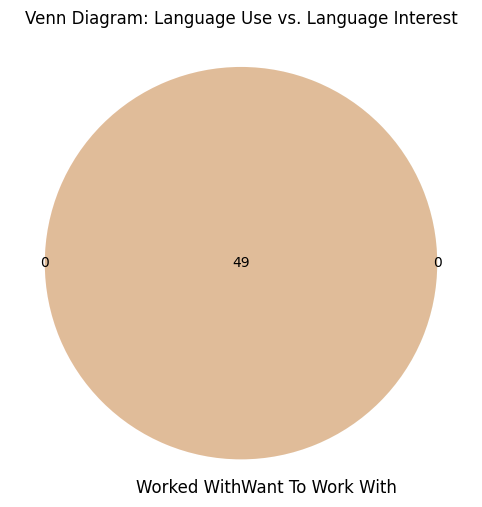

In [16]:

# Create sets
set_worked = set(worked_counter.keys())
set_want = set(want_counter.keys())

# Plot
plt.figure(figsize=(8, 6))
venn2([set_worked, set_want], set_labels=('Worked With', 'Want To Work With'))
plt.title('Venn Diagram: Language Use vs. Language Interest')
plt.show()

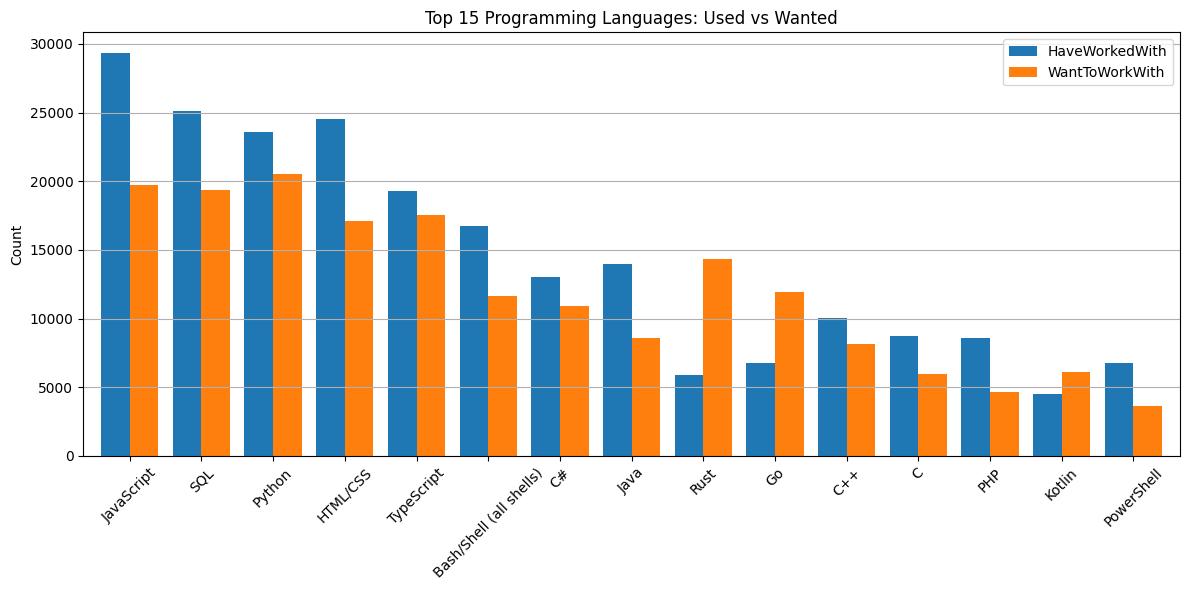

In [17]:
df_langs = pd.DataFrame({
    'HaveWorkedWith': worked_counter,
    'WantToWorkWith': want_counter
}).fillna(0)

# Get top 15 by total mentions
top_langs = df_langs.sum(axis=1).sort_values(ascending=False).head(15)

# Filter
df_top = df_langs.loc[top_langs.index]

# Plot
df_top.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Top 15 Programming Languages: Used vs Wanted')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

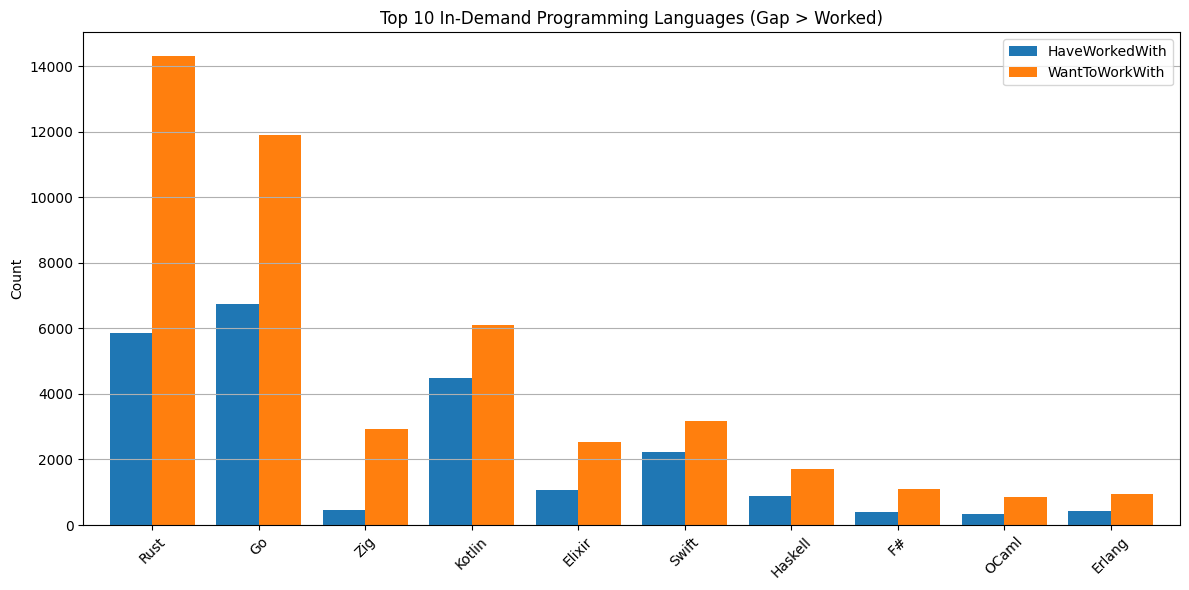

In [28]:
#Show Languages People Want to Use More Than They've Used
df_langs['InterestGap'] = df_langs['WantToWorkWith'] - df_langs['HaveWorkedWith']
df_langs_sorted = df_langs.sort_values(by='InterestGap', ascending=False).head(10)

df_langs_sorted[['HaveWorkedWith', 'WantToWorkWith']].plot(
    kind='bar', figsize=(12, 6), width=0.8)
plt.title('Top 10 In-Demand Programming Languages (Gap > Worked)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [18]:
country_mapping = {
    "Congo, Republic of the...": "Congo",
    "Democratic Republic of the Congo": "Congo",
    "Lao People's Democratic Republic": "Lao",
    "Libyan Arab Jamahiriya": "Libyan",
    "Democratic People's Republic of Korea": "Korea",
    "Micronesia, Federated States of...": "Micronesia",
    "Democratic People's Republic of Korea": "Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Russian Federation":"Russian",
    "Czech Republic":"Czech",
    "Iran, Islamic Republic of...":"Iran",
    "Hong Kong (S.A.R.)":"Hong Kong",
    "Viet Nam":"VietNam"
}
#df_cleaned.loc[:,'Country'] = df_cleaned['Country'].str.strip().map(country_mapping)
df_cleaned.loc[:,'Country'] = df_cleaned['Country'].str.strip()

#Replace only matching entries, keep others
df_cleaned.loc[:, 'Country'] = df_cleaned['Country'].replace(country_mapping)

print(df_cleaned['Country'].value_counts(dropna=False))

Country
United States      8760
Germany            4040
India              3011
United Kingdom     2544
Ukraine            2181
                   ... 
Nauru                 1
Chad                  1
Solomon Islands       1
Liberia               1
Barbados              1
Name: count, Length: 178, dtype: int64


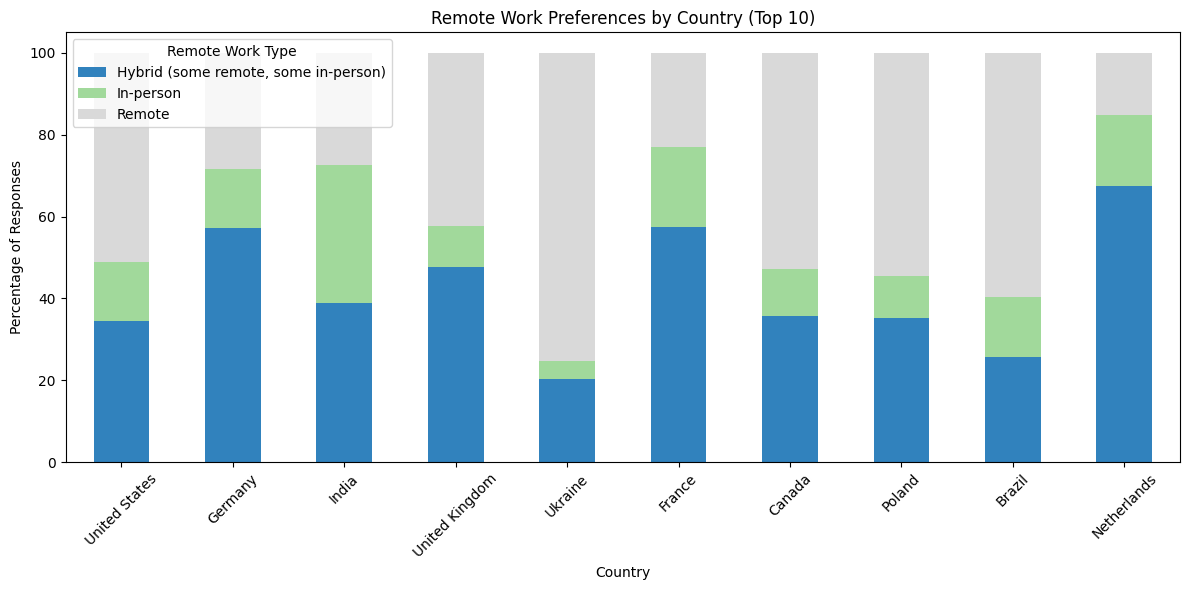

In [19]:
## Write your code here
# Group and normalize by country to get % distribution
remote_by_country = df_cleaned.groupby(['Country', 'RemoteWork']).size().unstack().fillna(0)

# Convert to percentage
remote_by_country_percent = remote_by_country.div(remote_by_country.sum(axis=1), axis=0) * 100

# Select top countries with most responses
top_countries = remote_by_country.sum(axis=1).sort_values(ascending=False).head(10).index
top_remote_countries = remote_by_country_percent.loc[top_countries]

# Plot
top_remote_countries.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Remote Work Preferences by Country (Top 10)')
plt.ylabel('Percentage of Responses')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Remote Work Type')
plt.tight_layout()
plt.show()

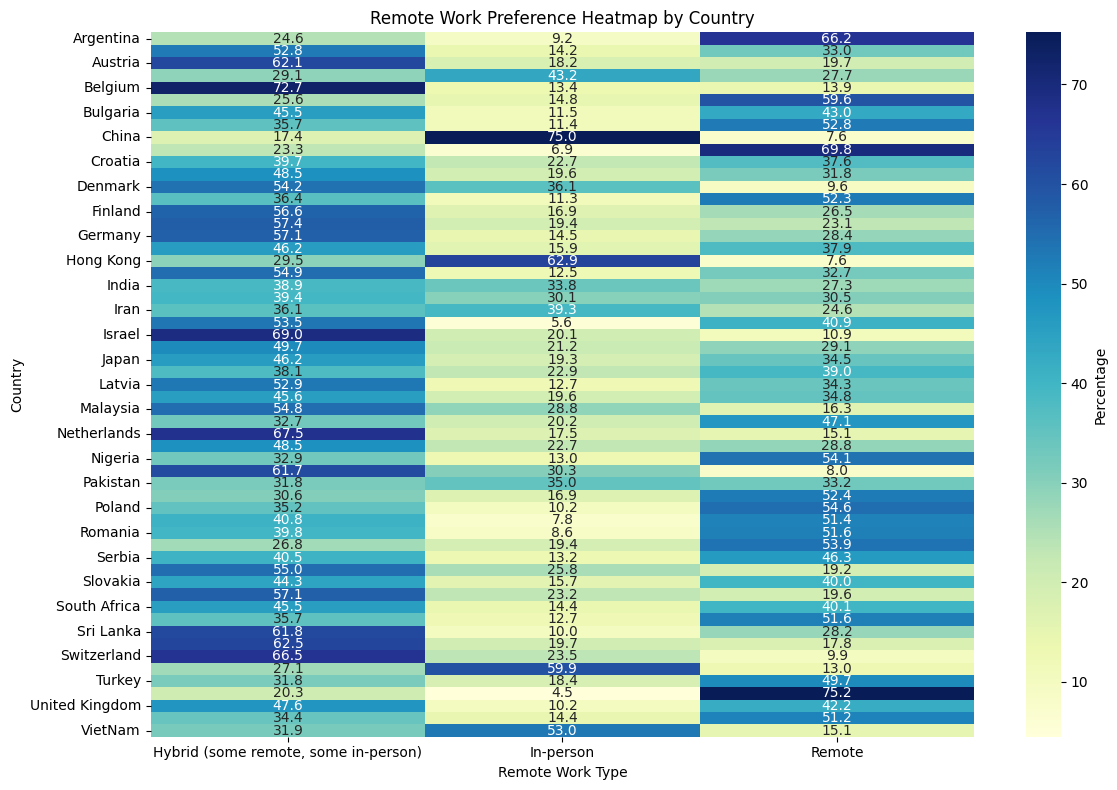

In [20]:
# Filter countries with significant responses (e.g., >100)
filtered_countries = remote_by_country[remote_by_country.sum(axis=1) > 100]

# Normalize to percentages
remote_percent_all = filtered_countries.div(filtered_countries.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(remote_percent_all, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
plt.title('Remote Work Preference Heatmap by Country')
plt.ylabel('Country')
plt.xlabel('Remote Work Type')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [27]:
df_corr = df_cleaned[['YearsCodePro', 'JobSat']].dropna()
print(df_corr.head())
df_corr.dtypes
df_corr['YearsCodePro'] = df_corr['YearsCodePro'].astype(float)
df_corr.dtypes

   YearsCodePro  JobSat
12         12.0     8.0
15         27.0     5.0
18         10.0    10.0
20          0.5     6.0
22         18.0     9.0


YearsCodePro    float64
JobSat          float64
dtype: object

In [28]:
## Write your code here
pearson_corr, p_pearson = pearsonr(df_corr['YearsCodePro'], df_corr['JobSat'])
spearman_corr, p_spearman = spearmanr(df_corr['YearsCodePro'], df_corr['JobSat'])

print(f"Pearson correlation: {pearson_corr:.3f} (p-value: {p_pearson:.3f})")
print(f"Spearman correlation: {spearman_corr:.3f} (p-value: {p_spearman:.3f})")

Pearson correlation: 0.104 (p-value: 0.000)
Spearman correlation: 0.119 (p-value: 0.000)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_302/194054763.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


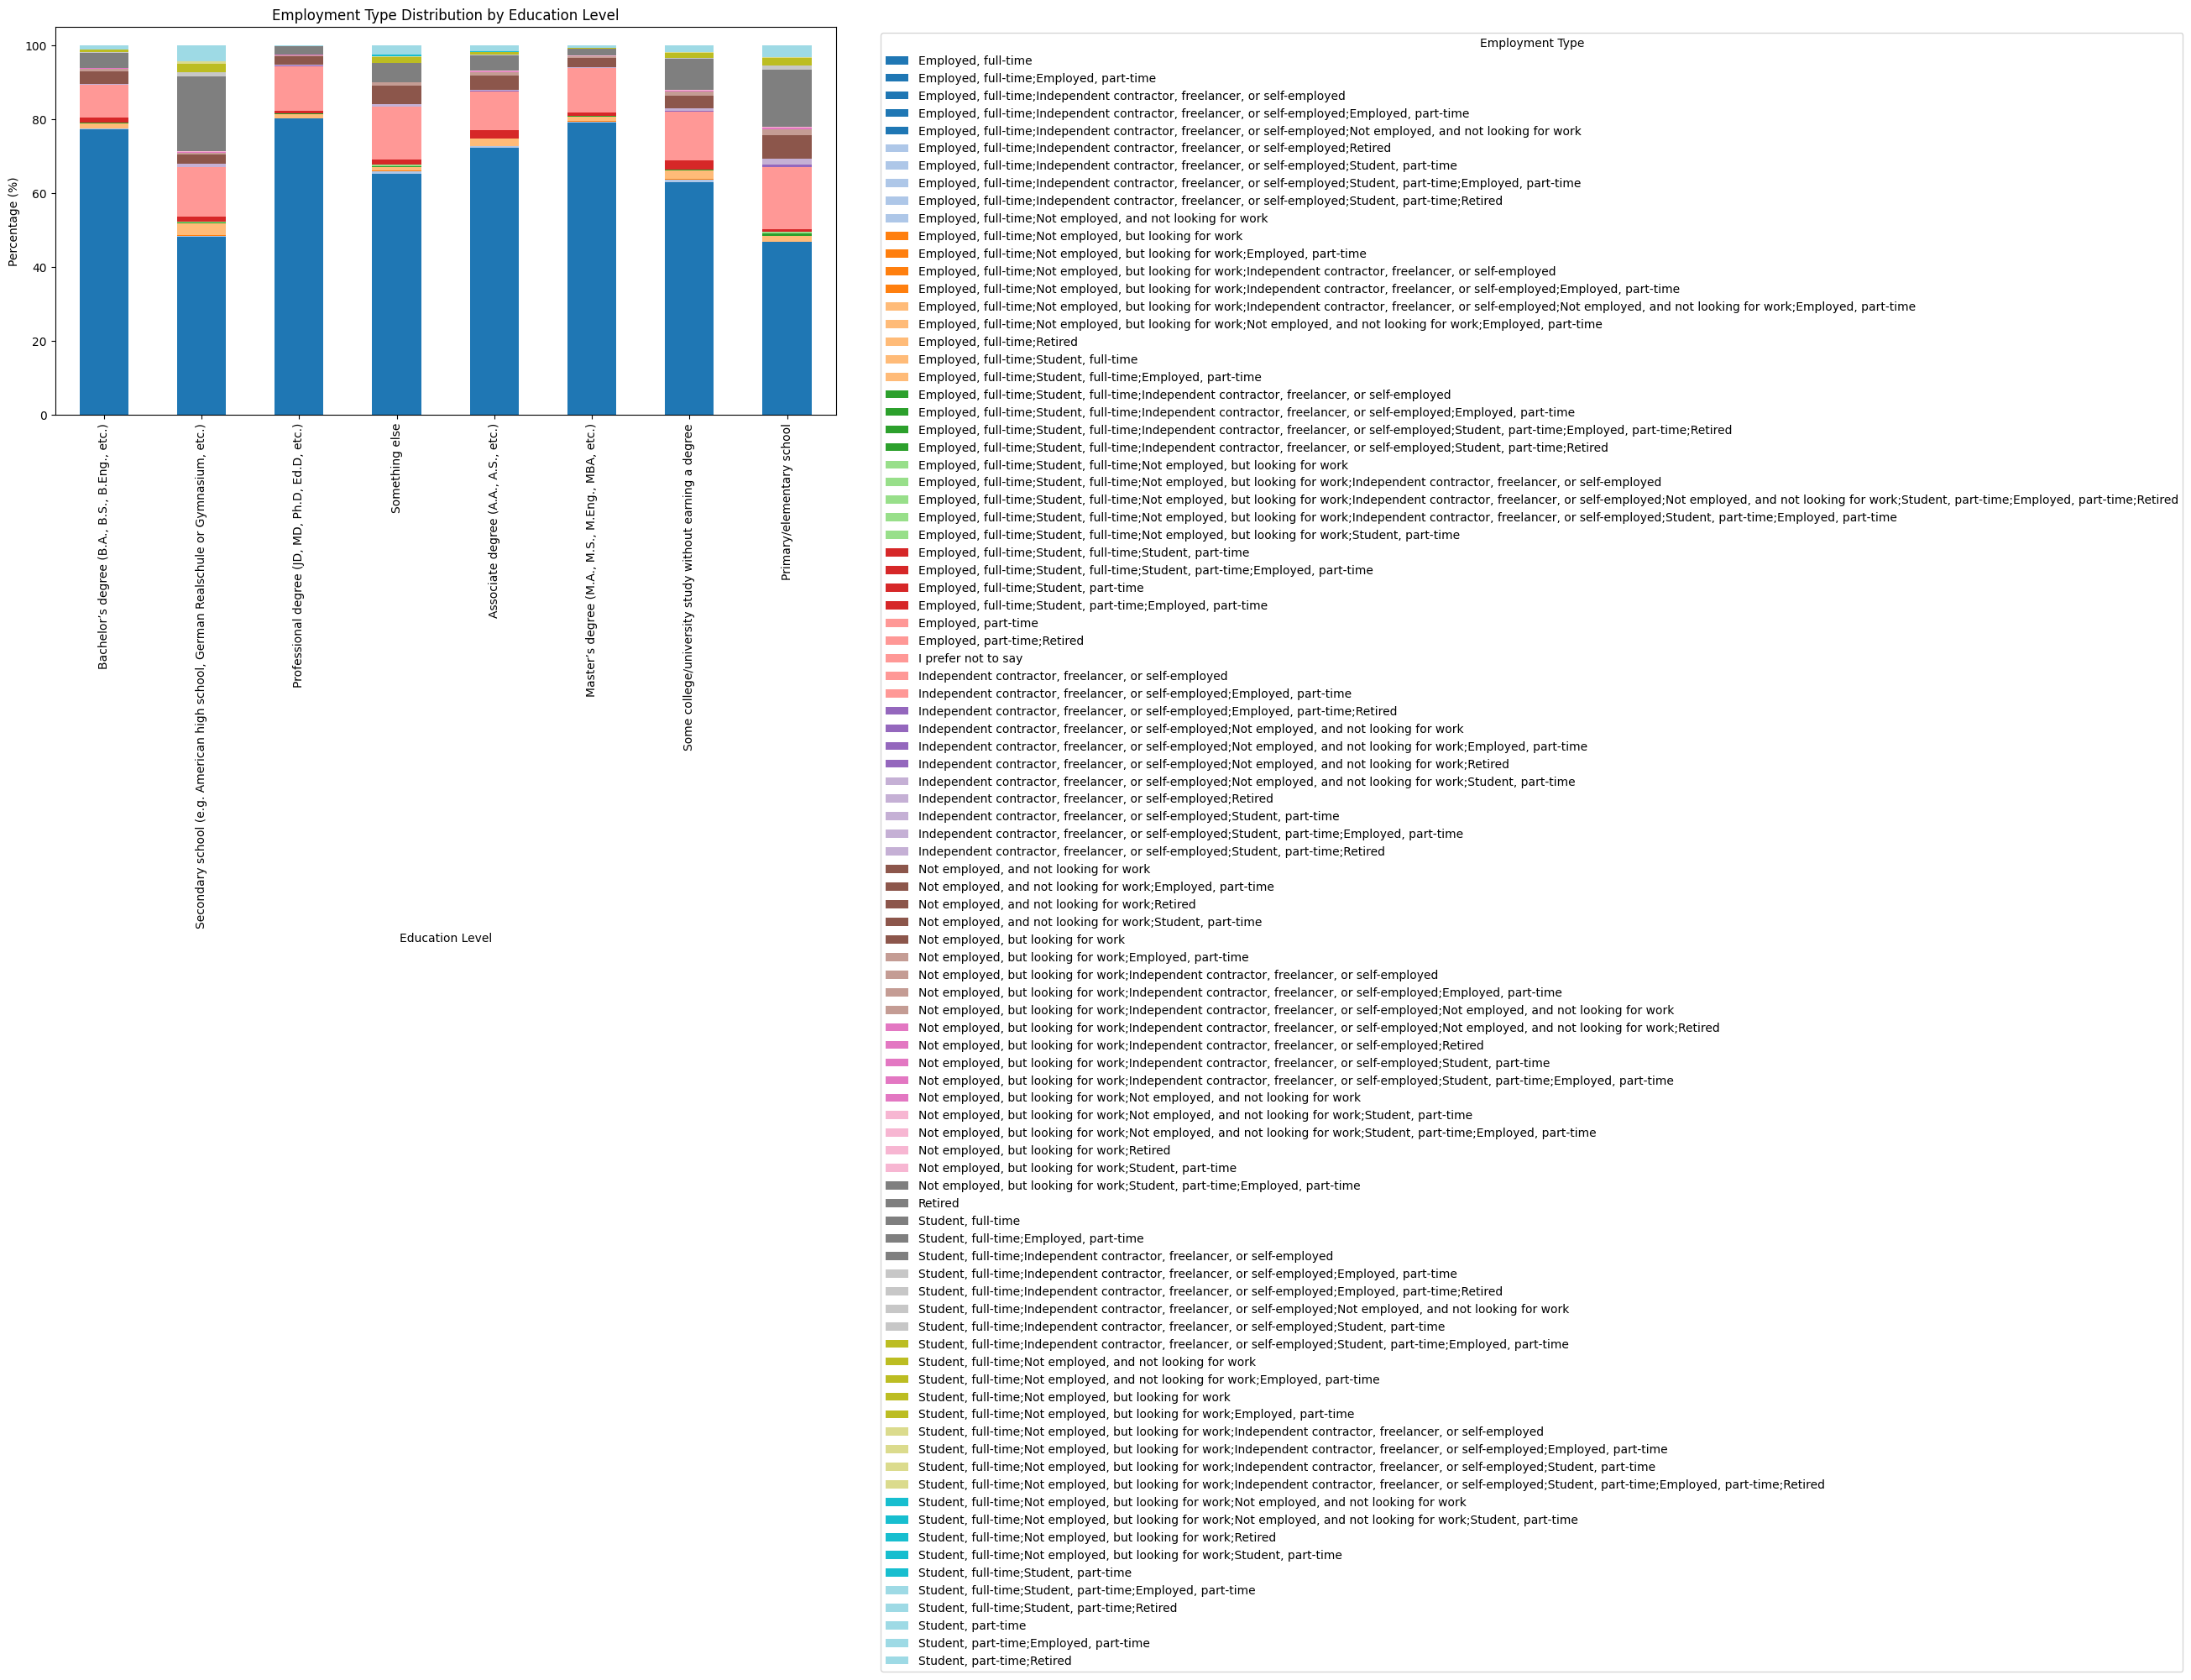

In [30]:
## Write your code here
# Cross-tabulation of Employment vs. EdLevel
crosstab = pd.crosstab(df_cleaned['EdLevel'], df_cleaned['Employment'], normalize='index') * 100

# Sort rows (education levels) by overall frequency (optional)
crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Employment Type Distribution by Education Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
def simplify_employment(emp):
    if pd.isnull(emp):
        return "Unknown"
    elif "full-time" in emp:
        return "Full-time"
    elif "part-time" in emp:
        return "Part-time"
    elif "Student" in emp:
        return "Student"
    elif "freelancer" in emp or "self-employed" in emp:
        return "Freelancer"
    elif "Retired" in emp:
        return "Retired"
    elif "Not employed" in emp:
        return "Unemployed"
    else:
        return "Other"

# Apply the function
df_cleaned.loc[:,'EmploymentSimple'] = df_cleaned['Employment'].apply(simplify_employment)

In [33]:
edlevel_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s degree",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional degree",
    "Associate degree (A.A., A.S., etc.)": "Associate degree",
    "Some college/university study without earning a degree": "College/University without degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Primary/elementary school": "Primary school",
    "Something else": "Other"
}
df_cleaned.loc[:,'EdLevel'] = df_cleaned['EdLevel'].str.strip().map(edlevel_mapping)
df_cleaned.loc[:,'EdLevel']=df_cleaned['EdLevel'].fillna('Unknown')

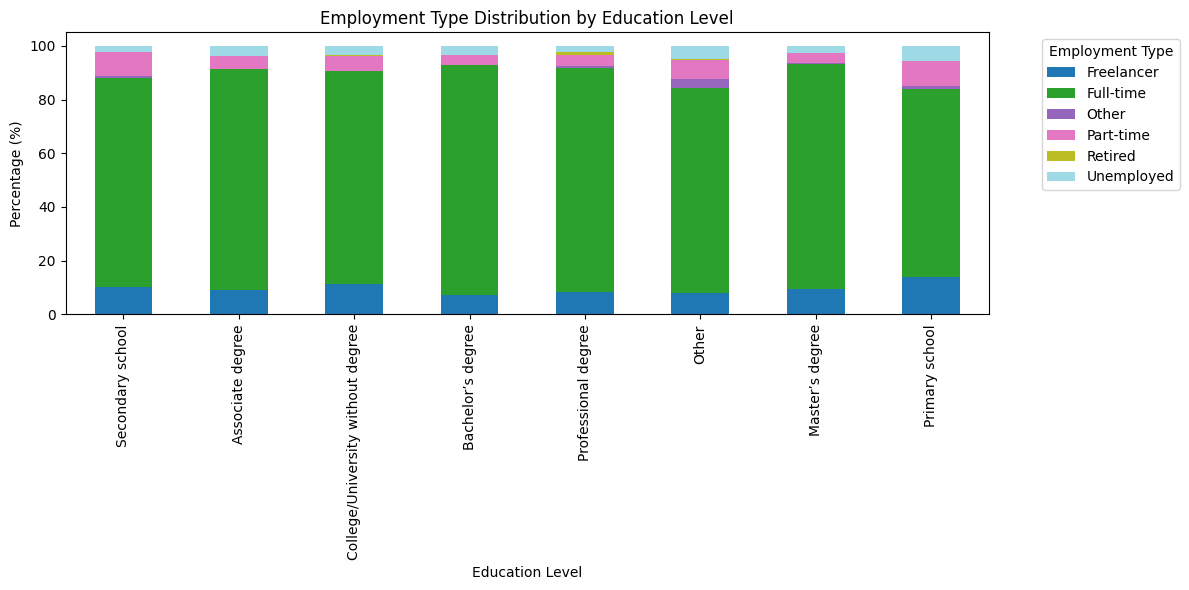

In [34]:
# Cross-tabulation of Employment vs. EdLevel
crosstab = pd.crosstab(df_cleaned['EdLevel'], df_cleaned['EmploymentSimple'], normalize='index') * 100

# Sort rows (education levels) by overall frequency (optional)
crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Employment Type Distribution by Education Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [35]:
## Write your code here
df_cleaned.to_csv("cleaned_survey_data_2.csv", index=False)
print("Dataset saved as cleaned_survey_data_2.csv")

Dataset saved as cleaned_survey_data_2.csv


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
